# The Semantic Location History of Hunter Hauser (Summer 2020)
* By: Hunter Hauser
* CPSC 222, Fall 2020

## Introduction

### Domain
The domain of my project will be a GPS/Location domain, this correlates to the google maps timeline and tracking system, which monitors a person’s travel. This domain is important to me because it shows me travelling habits that I did not before. Knowing my travelling habits, I can recognize my most visited places and travel habits. This can help me improve gas mileage, travel distance, and optimize my overall time consumption in travel. I am researching this domain because I am genuinely interested in my travel history and looking back at the places that I have traveled. This will give me insight into my own travel habits and as stated before I can make changes to benefit my time and pocket.

### The Dataset
The dataset consisted of my summer 2020 months (July - October) and different activities and attributes that were associated with my location and movements. I used this dataset to learn, test, and model some of my habita from the summer to gain insight into my habits and learn more about myself. 

### Stakeholders and Potential Impacts
Stakeholders for this project could include Google themselves, as I expose the Google timeline data and what they record each moment our phone is on and how service. This timeline data then could be used for fitness companies and travel companies because this data helps model and show my activity levels and travel tendencies. My location is revealed in this dataset which means Google Maps and companies interested in adventure could be of importance, looking to invest in the data to improve accuracy or associate with travel. Also, I am a stakeholder, as i hope to understand my travel habits and learn from the data to improve myself.

The potential impact could be the revelation in personal change. Such as my time in a vehicle seemed much too high, which by consequence creates carbon emissions and damages the earth, so I now run many more places. Due to COVID I have also started to travel much less and increase my activity levels in the 'running' category to change my previou statisitcs. Another potential impact is the image of Google. This data proves Googlr monitors our every move and does not appear as trustworthy company because my data is being collected down to where I ate that day without my knowledge. 

### Hypothesis
Intially, I wanted measure distance and travel from the dataset comparing my months based on college or home. I took to this by making two hypothesis based on my locations and distances. I focused on aspects such as school, work, and date then created my hypothesis:
* Is the mean amount of unique places traveled over the summer, over 50 places?
* Is the mean amount of travelled distance on Mondays different than Fridays for the months of July and August?  

This focuses on location, comparing the amount of unique location to a hypothesized mean and the second hypothesis focuses on days of the week and distance travelled. I chose those two days because my activities seem to differ on Monday and Friday of the week.

### Classification
I used the kNN neighbors classifier to predict what activities I would preform based on the temperature and distance inputed. I used September and October as the sample dataset. First, I predicted the dataset and activity with a test value I entereted and then used train_test_split to create another example. Along with the kNN neighbors classifier I also used a decision tree classifier to check my accuracy with the hold-out method. 

## Data Analysis 

### Google Timeline Data Description:
My dataset which consisted of data collected by Google.com and then seperated into mnay categories. I speciffically chose 11 of those attributes to act as my data and explore those selected categories for this project.
* Dates
* activityType 
* distance(m) 
* confidence (chance of activity being accurate)
* probability (% that I am actually doing the activity)
* name (name of business/location of address)
* address
* placeConfidence (chance of place being accurate)
* locationConfidence (% that I am actually at the location)
* Day of week
* Temp(F)

### Data preparation:
The first step to the project was to be able to read and interpret the JSON file. After help from Professor Gina Sprint, I used helper code to help me parse sepcific keys out of the Json file. Due to the topic of my project I wanted any data related to travel and location which consited of 9 categories. In addition, I added two more categories of temperature in farenheit and days of the week based on the date. This allowed me to conduct further data analysis, and bringing the attribute total to 11 columns. Focusing on the months of July, August, September, and October, I can analyze data from summer to the beginning of fall and see how my habits change in correlation to my transition form Vancouver Washington to Spokane Washington. 

### Data Cleaning:
* Convert from JSON to CSV
* Extract keys and convert attributes
* Change dates from UNIX (ms) to date year-month-day
* Add days of the week 
* Eventually add temperature in farenheit
* Drop any unwanted Data
* Fill in missing data to keep full months 

In [1]:
import json
import pandas as pd
import datetime
import utils
import requests 
import matplotlib.pyplot as plt
import os
import numpy as np 
import scipy.stats as stats
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#creates all DataFrames and CSV's excecpt for Summer_2020_Complete.csv
july_df = utils.merge_data("2020_JULY.json")
july_df = utils.add_weekday(july_df)
july_df.to_csv("2020_JULY.csv")
august_df = utils.merge_data("2020_AUGUST.json")
august_df = utils.add_weekday(august_df)
august_df.to_csv("2020_AUGUST.csv")
september_df = utils.merge_data("2020_SEPTEMBER.json")
septmeber_df = utils.add_weekday(september_df)
september_df.to_csv("2020_SEPTEMBER.csv")
october_df = utils.merge_data("2020_OCTOBER.json")
october_df = utils.add_weekday(october_df)
october_df.to_csv("2020_OCTOBER.csv")

## Exploratory Data Analysis
* I need to aggregate my data and for this I will appraoch different columns in my data and compare the results in charts. Also, add the temperature column to be used in a bar chart.  
* I will be using the activity across the months to measure what activities I most commonly do.
* I will compare location across the months and how they correlate.
* I will use the new found temperature data from MeteoStat to comapre distances and temperature across ALL motnhs. 

## Pie Chart: July 
In July I was still home in Vancouver Washington and did the most I could to visit the outdoors. I believe the correlation in driving has to do with the mass of travel to get to the hikes on the mountain. Another thing I believe that affects the percentages is losing service at many points on the mountain, not accurately reporting the walking stat. Also the google term for boat is "in Ferry", but in the month of July I certainly boated a few times. 

In [3]:
data = pd.read_csv("2020_JULY.csv", index_col=0, header=0)
df = pd.DataFrame(data)

n1_jul = df["activityType"].value_counts()["IN_PASSENGER_VEHICLE"]
n2_jul = df["activityType"].value_counts()["WALKING"]
n3_jul = df["activityType"].value_counts()["RUNNING"]
n4_jul = df["activityType"].value_counts()["IN_FERRY"]

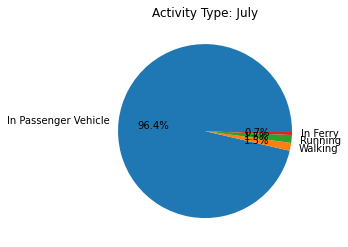

In [4]:
import matplotlib.pyplot as plt
x_july = ["In Passenger Vehicle", "Walking", "Running", "In Ferry"]
y_july = [n1_jul,n2_jul,n3_jul,n4_jul]
plt.figure()
plt.pie(y_july, labels=x_july, autopct='%1.1f%%')
plt.title("Activity Type: July")
plt.show()

## Pie Chart: August
Deviating from July, I only had three activities and noticed my vehicle travel was a lower percentage than before. My overall recorded trips of 710 was more than July but I also walked and ran more, mostly because I got more into workouts before school started affecting my data.

In [5]:
data = pd.read_csv("2020_AUGUST.csv", index_col=0, header=0)
df = pd.DataFrame(data)

n1_aug= df["activityType"].value_counts()["IN_PASSENGER_VEHICLE"]
n2_aug = df["activityType"].value_counts()["WALKING"]
n3_aug = df["activityType"].value_counts()["RUNNING"]

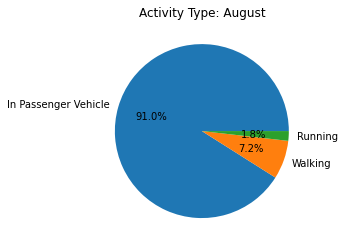

In [6]:
import matplotlib.pyplot as plt
x_august = ["In Passenger Vehicle", "Walking", "Running"]
y_august= [n1_aug,n2_aug,n3_aug]
plt.pie(y_august, labels=x_august, autopct='%1.1f%%')
plt.title("Activity Type: August")
plt.show()

## Pie Chart: September
September was my first month at Gonzaga officially and in those 30 days I had a drastic change in transportation, my feet. Moving into the Kennedy Apartments, I mostly walked around campus for the rest of the semester and my steps shot up drastically. This lead to my locations visted to also drop drastically. On another note I would cycle at the RFC and the maps recorded those stats, which is very interesting. 

In [7]:
data = pd.read_csv("2020_SEPTEMBER.csv", index_col=0, header=0)
df = pd.DataFrame(data)

n1_sep= df["activityType"].value_counts()["IN_PASSENGER_VEHICLE"]
n2_sep = df["activityType"].value_counts()["WALKING"]
n3_sep = df["activityType"].value_counts()["RUNNING"]
n4_sep = df["activityType"].value_counts()["CYCLING"]

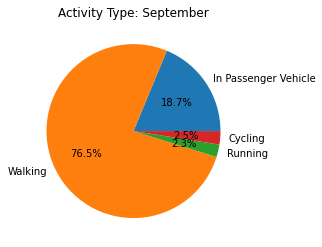

In [8]:
import matplotlib.pyplot as plt
x_september = ["In Passenger Vehicle", "Walking", "Running","Cycling"]
y_september= [n1_sep,n2_sep,n3_sep,n4_sep]
plt.pie(y_september, labels=x_september, autopct='%1.1f%%')
plt.title("Activity Type: September")
plt.show()

## Pie Chart: October 
One issue I see with Ocotber is that my running days did not get recorded. I do not know why, but my running in the mornings did not get recorded successfully, skewing the results for October. Overall, my activity was similar to Spetember because campus life was very static in comparisons to home life, the travel is very selective at school and less sparatic than my time at home in Vancouver.

In [9]:
data = pd.read_csv("2020_OCTOBER.csv", index_col=0, header=0)
df = pd.DataFrame(data)

n1_oct= df["activityType"].value_counts()["IN_PASSENGER_VEHICLE"]
n2_oct= df["activityType"].value_counts()["WALKING"]
n3_oct = df["activityType"].value_counts()["CYCLING"]

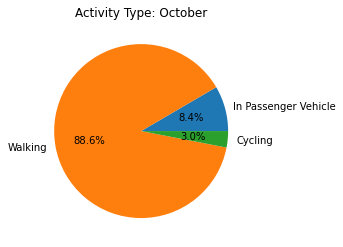

In [10]:
x_october = ["In Passenger Vehicle", "Walking", "Cycling"]
y_october= [n1_oct,n2_oct,n3_oct]
plt.pie(y_october, labels=x_october, autopct='%1.1f%%')
plt.title("Activity Type: October")
plt.show()

## Bar Chart: Unique Places vs Month
I thought the amount of unique places visited would be much higher in the month of August, but July was my most adventurous. On a seperate note Septmeber and August look expected due to my travel pretty much being resitricted to campus and occasionally dominoes. The data was not extremely odd but the location accuracies really threw me for a loop.

54 41 16 8


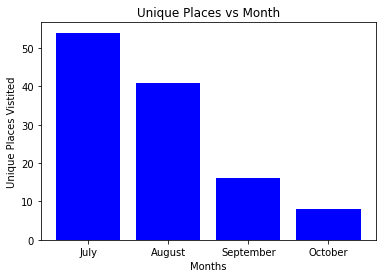

In [11]:
x=july_df["name"].nunique()
y=august_df["name"].nunique()
z=september_df["name"].nunique()
w=october_df["name"].nunique()
print(x,y,z,w)
unique_places = [x,y,z,w]
x = ["July", "August", "September","October"]
plt.figure()
plt.bar(x, unique_places, color="blue")
plt.title("Unique Places vs Month")
plt.xlabel("Months")
plt.ylabel("Unique Places Vistited")
plt.show()

## Location Confidence vs Unique Places Visted 
Using the location confidence feature Google provides and which is included in the JSON file i wanted to see the correlation of location to amount of places visted. More specifically, the accuracy on which the locations on recorded. I would assume the accuracy would be higher if there was less places to record, but I was wrong. I believe this was due to me being on the Gonzaga Campus. At first thought, I believed Google maps would try to categorize each building of Gonzaga as just, "Gonzaga". I was wrong and the maps tried to pinpoint my position on a college campus which provided far more inaccurate results than my travels over July and August.

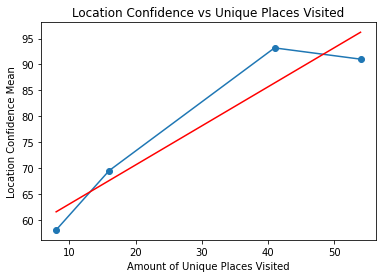

In [12]:
import numpy as np
x_1=july_df["locationConfidence"].mean()
y_1=august_df["locationConfidence"].mean()
z_1=september_df["locationConfidence"].mean()
w_1=october_df["locationConfidence"].mean()

location_conf = [x_1, y_1, z_1, w_1]

#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.nunique.html
#allows me to grab unqiue places visited rather than repeated locations
x=july_df["name"].nunique()
y=august_df["name"].nunique()
z=september_df["name"].nunique()
w=october_df["name"].nunique()

unique_places = [x,y,z,w]

plt.figure()
plt.plot(unique_places,location_conf,marker="o")
plt.title("Location Confidence vs Unique Places Visited")
plt.xlabel("Amount of Unique Places Visited")
plt.ylabel("Location Confidence Mean")

#trendline
line1 = np.polyfit(unique_places,location_conf,1)
line2 = np.poly1d(line1)
plt.plot(unique_places, line2(unique_places), "r-")
plt.show()

## Adding weather data
After learing how to use the Api's in class and learning how to use MeteoStat API I decided to add weather to each of my month csv's to correlate my locations and activity to the weather.

In [13]:
july_df = utils.vancouver_weather("2020-07-01", "2020-07-31", july_df)
july_df.to_csv("2020_JULY.csv")
august_df = utils.vancouver_weather("2020-08-01", "2020-08-31", august_df)
august_df.to_csv("2020_AUGUST.csv")
#had to create seperate functions because the id location for portland was different 
september_df = utils.spokane_weather("2020-09-01", "2020-09-30", september_df) 
september_df.to_csv("2020_SEPTEMBER.csv")
october_df = utils.spokane_weather("2020-10-01", "2020-10-31", october_df)
october_df.to_csv("2020_OCTOBER.csv")

In [14]:
os.remove("WEATHER.csv") #https://www.w3schools.com/python/python_file_remove.asp
#deletes weather.csv that is used to implement weather 

## Distance vs Temperatures
Using the new temperatures from MeteoStat I compared my distances travelled to certain temperatures. One thing I found very interesting was, the hotter is was actually equated to overall less travel. I think that is because at a certain point the heat is too much to bare and I cannot be outside for too long without feeling like a steaming hotdog. The perfect temp for adventure is mid-70's and this is proven through the graph with the amount of diatnce travelled being extremely high near the mid-70's. 

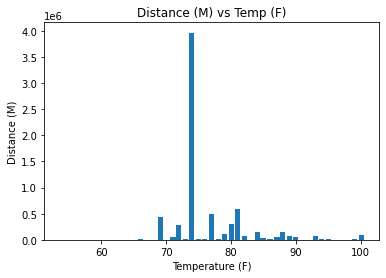

In [15]:
plt.figure()
one_summer_df = july_df.append(august_df)
two_summer_df = september_df.append(october_df)
full_summer_df = one_summer_df.append(two_summer_df)
#Creates DataFrame with all months and data together 
#Outputs that data frame to CSV with complete data 
full_summer_df.to_csv("SUMMER_2020_COMPLETE.csv")

plt.bar(full_summer_df["Temp(F)"], full_summer_df["distance(m)"] )
plt.title("Distance (M) vs Temp (F)")
plt.xlabel("Temperature (F)")
plt.ylabel("Distance (M)")
plt.show()

## Hypothesis Test one 1:
* Problem:  is the mean amount of unique places traveled over the summer, over 50 places?
* Data: Location history of Hunter Hauser from July-October 
* Type of t-test: one sample one-tailed test 

Step 1 State the null and alternative hypothesis:  
* $H_0$ is the null; what we are testing
    * $H_0: M_{places} \ge M_{predicted}$
* $H_1$ is the alternative; accepted if null hypothesis is rejected
    * $H_1: M_{places} < M_{predicted}$

Step 2 Level of Significance:
* $\alpha$ is the level of significance.
    * $\alpha$ = 0.05

Step 3 Appropriate test statisitc:  
* Test stat: a formula that produces the conditions under which you reject $H_0$
    * t test for one sample: $$t=\frac{\overline{x} - \mu}{s\sqrt{n}}$$

In [16]:
ttest_computed = stats.ttest_1samp(unique_places, 50)
print(ttest_computed) #t-test results 

Ttest_1sampResult(statistic=-1.8905497397592381, pvalue=0.15507032462707188)


Step 4 Formulate decision rule:
* If the t-test result is greater than 2.353 (found from t-table with df=3) then reject $H_0$ and accept $H_1$
* Otherwise, if the t-test result is less than 2.353 then fail to reject $H_0$

Step 5 Conclsuion:  
* Due to my t-test result of -1.89 being far less than the t-test statisitc of 2.353 I must reject the alternative hypothesis and accept $H_0$. This means that my on avergae the amount of unique places vistied over the summer was much less than 50. This must have occured because the last two months of summer the amount of unique places decreased drastically. This large decrease haveily affected the mean, especially since one month (July) was the only month I vistied over 50 places. In reality, I should have used a better mean to test on and would have been more accurate pertaining to the data. Also, the p-value was out of range of the alpha of 0.05 so this must mean I accept the NULL hypothesis.

## Hypothesis Test two 2:
I want to measure my distance travelled on Mondays and Fridays beacuse Monday, being the start of the week, means my travel would be diiferent to due to work or school. I will compare only July and August as those were the months that I had my vehicle and see if my travel on Fridays and Mondays were the same or different.

* Problem: is the mean amount of travelled distance on Mondays different than Fridays for the months of July and August? 
* Data: Location history of Hunter Hauser from July-August 
* Type of t-test: two sample independent two-tailed test 

In [17]:
#data is grouped by distances on only monday and friday for the months of July and August
group_by_julyday = july_df.groupby("Day of week")
group_by_augustday = august_df.groupby("Day of week")
monday_july_meters = list(np.array(group_by_julyday.get_group("Monday")['distance(m)'].unique()))
friday_july_meters = list(np.array(group_by_julyday.get_group("Friday")['distance(m)'].unique()))
monday_august_meters = list(np.array(group_by_augustday.get_group("Monday")['distance(m)'].unique()))
friday_august_meters = list(np.array(group_by_augustday.get_group("Friday")['distance(m)'].unique()))
#Total distances for only monday and friday in the months of July and August
monday_distances = monday_july_meters + monday_august_meters
friday_distances = friday_july_meters + friday_august_meters

Step 1 State the null and alternative hypothesis:  
* $H_0$ is the null; what we are testing
    * $H_0: M_{Monday}  != M_{Friday}$
* $H_1$ is the alternative; accepted if null hypothesis is rejected
    * $H_1: M_{Monday} = M_{Friday}$

Step 2 Level of Significance:
* $\alpha$ is the level of significance.
    * $\alpha$ = 0.05

Step 3 Appropriate test statisitc:  
* Test stat: a formula that produces the conditions under which you reject $H_0$
    * t test for two sample: $$t=\frac{\overline{X_1} - \overline{X_2}}{\sqrt{s_p^2(\frac{1}{n_1}+\frac{1}{n_2})}}$$

In [18]:
ttest_computed = stats.ttest_ind(monday_distances, friday_distances)
print(ttest_computed) #t-test results 

Ttest_indResult(statistic=0.6740122896814595, pvalue=0.5022224779767943)


In [19]:
n1 = len(monday_distances)
n2 = len(friday_distances)
df = n1 + n2 -2
print("df =",df)

df = 81


Step 4 Formulate decision rule:
* If the t-test result is within the range $-1.990 \le x \le 1.990$ (found from t-table with df=81 and alpha is 0.05) then reject $H_0$ and accept $H_1$
* Otherwise, if the t-test result is outisde the range than then fail to reject $H_0$

Step 5 Conclusion: 
* The t-test result was actually in the range of the t-test statisitic, but the p-value was 0.50 which is far beyond the range of alpha which is 0.05. This means the data cannot accept $H_1$ because the p_value was out of range, forcing the NULL hypothesis to be the conclsuion. The amount of travel on Mondays and Fridays was different because the test was essentially inconclusive. I believe the test was inconclusive because the types of travel had discrepencies from July to August, as indicated by earlier pie charts. This change in distances causes the data to have too many outliers casuing the significance to be out of porportion. This invalidates the data, but still was an interesting test. 

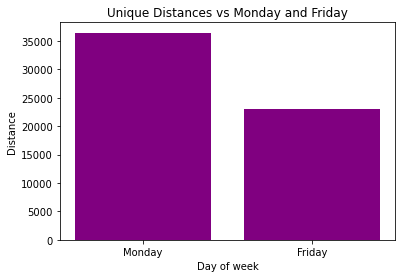

In [20]:
plt.figure()
plt.bar(["Monday", "Friday"], [np.mean(monday_distances),  np.mean(friday_distances)], color="Purple")
plt.title("Unique Distances vs Monday and Friday")
plt.xlabel("Day of week")
plt.ylabel("Distance")
plt.show()

The above graph is a part of of the conclsuion as it represents the means of the days. There is an over 10,000 meter difference and this subsequently renders the hypothesis unusable, and also demonstrates the accuracy of the conclusion the test provides, proving the distances are different

## Classification
For this section I appraoched the classifiers using a sample set of September and October because previously I used July and August for the second hypothesis test. This led to me wanting to predict what type of activity I would do based on the distance and temperature. I created a kNN Neighbors classifier to test the 5 closest neighbors and predict a test instance of my choice, then use the hold-out method. I then compared my hold-out method kNN Neighbors and compared the accuracy to a DecisionTree Classifier to determine the accuracies of both methods and compare the results. 

In [21]:
summer_df = september_df.append(october_df)
column = ["Dates", "activityType","confidence","probability","name","address","placeConfidence","locationConfidence","Day of week"]
x_train = summer_df.drop(column, axis=1)
y_train = summer_df["activityType"]


#normalize temps
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_normalized = scaler.transform(x_train)

x_test = [1000,88] #test sample is 1000 meters and 88 degrees farenheit
x_test_normalized = scaler.transform([x_test])

knn_clf = KNeighborsClassifier(n_neighbors = 5, metric="euclidean")
knn_clf.fit(x_train_normalized, y_train)
y_predicted = knn_clf.predict(x_test_normalized)
print("prediction:", y_predicted)

prediction: ['WALKING']


Now using the hold-out method for both the kNN Neighbors and DecisionTree Classifiers.  

In [22]:
x = summer_df.drop(column, axis=1)
y = summer_df["activityType"]

#hold-out method
x = scaler.fit_transform(x)#apply scale before train test split 
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, stratify=y)

clf = KNeighborsClassifier(n_neighbors = 5, metric="euclidean")
clf.fit(x_train, y_train)

y_predicted = clf.predict(x_test)
print("Neighbors Classifier:")
print(y_predicted)

Neighbors Classifier:
['WALKING' 'WALKING' 'CYCLING' 'WALKING' 'WALKING' 'WALKING' 'WALKING'
 'WALKING' 'WALKING' 'WALKING' 'WALKING' 'WALKING' 'WALKING'
 'IN_PASSENGER_VEHICLE' 'WALKING' 'WALKING' 'WALKING' 'WALKING' 'WALKING'
 'WALKING' 'WALKING' 'WALKING' 'WALKING' 'WALKING' 'WALKING' 'WALKING'
 'IN_PASSENGER_VEHICLE' 'WALKING' 'IN_PASSENGER_VEHICLE' 'WALKING'
 'IN_PASSENGER_VEHICLE' 'WALKING' 'WALKING' 'WALKING'
 'IN_PASSENGER_VEHICLE' 'CYCLING' 'WALKING' 'WALKING'
 'IN_PASSENGER_VEHICLE' 'WALKING' 'WALKING' 'WALKING' 'WALKING' 'WALKING'
 'WALKING' 'WALKING' 'WALKING' 'WALKING' 'WALKING' 'WALKING' 'WALKING'
 'WALKING' 'IN_PASSENGER_VEHICLE' 'CYCLING' 'WALKING' 'WALKING'
 'IN_PASSENGER_VEHICLE' 'WALKING' 'IN_PASSENGER_VEHICLE' 'WALKING'
 'WALKING' 'WALKING' 'IN_PASSENGER_VEHICLE' 'WALKING' 'WALKING' 'WALKING'
 'CYCLING' 'WALKING' 'WALKING' 'IN_PASSENGER_VEHICLE' 'WALKING' 'WALKING'
 'WALKING' 'WALKING' 'IN_PASSENGER_VEHICLE' 'WALKING' 'WALKING' 'WALKING'
 'WALKING' 'WALKING' 'CYCLIN

In [23]:
tree_clf = DecisionTreeClassifier(random_state=0)
tree_clf.fit(x_train, y_train)
y_predicted_tree = tree_clf.predict(x_test)
print("DecisionTree Classifier:")
print(y_predicted_tree)

DecisionTree Classifier:
['WALKING' 'WALKING' 'IN_PASSENGER_VEHICLE' 'WALKING' 'WALKING' 'WALKING'
 'WALKING' 'WALKING' 'WALKING' 'WALKING' 'WALKING' 'WALKING' 'WALKING'
 'IN_PASSENGER_VEHICLE' 'WALKING' 'WALKING' 'WALKING' 'WALKING' 'WALKING'
 'WALKING' 'WALKING' 'WALKING' 'WALKING' 'WALKING' 'WALKING' 'WALKING'
 'IN_PASSENGER_VEHICLE' 'WALKING' 'WALKING' 'WALKING'
 'IN_PASSENGER_VEHICLE' 'WALKING' 'WALKING' 'WALKING' 'WALKING'
 'IN_PASSENGER_VEHICLE' 'WALKING' 'WALKING' 'IN_PASSENGER_VEHICLE'
 'WALKING' 'WALKING' 'WALKING' 'WALKING' 'WALKING' 'WALKING' 'WALKING'
 'WALKING' 'WALKING' 'WALKING' 'WALKING' 'IN_PASSENGER_VEHICLE' 'WALKING'
 'IN_PASSENGER_VEHICLE' 'CYCLING' 'WALKING' 'WALKING' 'WALKING' 'WALKING'
 'WALKING' 'WALKING' 'WALKING' 'WALKING' 'IN_PASSENGER_VEHICLE' 'WALKING'
 'WALKING' 'WALKING' 'CYCLING' 'WALKING' 'WALKING' 'IN_PASSENGER_VEHICLE'
 'WALKING' 'WALKING' 'WALKING' 'WALKING' 'WALKING' 'WALKING' 'WALKING'
 'WALKING' 'WALKING' 'WALKING' 'IN_PASSENGER_VEHICLE' 'WALKING

### Results
The DecisionTree classifier was supposedly 100 percent accurate and the kNN Neighbors was approximately 93 percent accurate, meaning that the decsion tree would be more accurate. Though, learning from class the better accuracy is not necessarily the best statisitic to base my data off of. In conclusion, for this dataset I believe DecisionTree Classifier is the better classifier to use. 

In [24]:
accuracy = clf.score(x_test, y_test)
print("KNN Neighbors accuracy:", accuracy)
accuracy_tree = tree_clf.score(x_test, y_test)
print("DecisionTree accuracy:", accuracy_tree)

KNN Neighbors accuracy: 0.9288888888888889
DecisionTree accuracy: 1.0


## Conclusion

### Summary
The dataset I used for classification was my Google Timeline data from September and October 2020. The first challenge I faced was finding a category to predict, which I eventually used activityType and predicted the activity beased on distance and temperature. I chose those classifiers because running, walking, cycling, and driving all offer varying distances and each activity is done in different weather conditions. Using kNN Neighbors and DecisionTree classification methods and the approach worked well, providing high accuracies. I do believe this could have been biased because my travel in the last two months of the data were focused on walking. To improve the data set next attempt I could possibly use even more number neighbors or try k-fold cross validation and test every single instance in the dataset.

### Ethics
Serious ethical impacts come along with this dataset. I have now recognized my invasion of privacy by Google and how they monitor me without even knowing. They take into account exact locations, tendencies, activites, and so much more. Much like the "Social Dilemma" documentary there is a digital model of me being built and Google can access this to predict my movements and track me real-time. This is also important for other stakeholders because if other companies use this data, is it a violation of privacy or just business. These companies can potentially buy very important data and learn so much more about an indiviudal without ever even speaking to them. 